# Prepare Forecasting Model For Airlines Passengers data set

## Data Description:

- Month :	month of the year: 'jan' to 'dec'
- Passengers : no of passengers

## Attaching Resources

### Importing Necessary Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,3)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [63]:
al = pd.read_excel(r'C:\Users\ASUS\OneDrive\Documents\GitHub\Data-Science-Assignments\Assignment_18_Forecasting\Dataset\Airlines+Data.xlsx')
al.rename({'Month':'Date'}, axis=1, inplace=True)

al

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [64]:
al.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [65]:
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [66]:
al.isna().sum()

Date          0
Passengers    0
dtype: int64

In [67]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))


In [68]:
uni(al)


 All Unique Value in Date
['1995-01-01T00:00:00.000000000' '1995-02-01T00:00:00.000000000'
 '1995-03-01T00:00:00.000000000' '1995-04-01T00:00:00.000000000'
 '1995-05-01T00:00:00.000000000' '1995-06-01T00:00:00.000000000'
 '1995-07-01T00:00:00.000000000' '1995-08-01T00:00:00.000000000'
 '1995-09-01T00:00:00.000000000' '1995-10-01T00:00:00.000000000'
 '1995-11-01T00:00:00.000000000' '1995-12-01T00:00:00.000000000'
 '1996-01-01T00:00:00.000000000' '1996-02-01T00:00:00.000000000'
 '1996-03-01T00:00:00.000000000' '1996-04-01T00:00:00.000000000'
 '1996-05-01T00:00:00.000000000' '1996-06-01T00:00:00.000000000'
 '1996-07-01T00:00:00.000000000' '1996-08-01T00:00:00.000000000'
 '1996-09-01T00:00:00.000000000' '1996-10-01T00:00:00.000000000'
 '1996-11-01T00:00:00.000000000' '1996-12-01T00:00:00.000000000'
 '1997-01-01T00:00:00.000000000' '1997-02-01T00:00:00.000000000'
 '1997-03-01T00:00:00.000000000' '1997-04-01T00:00:00.000000000'
 '1997-05-01T00:00:00.000000000' '1997-06-01T00:00:00.000000000

### Separating Month and Year into Separate Column

In [69]:
al["month"] = al.Date.dt.strftime("%b")
al["year"]  = al.Date.dt.strftime("%Y")

al.head(10)

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


In [70]:
hm_y_m = pd.pivot_table(data=al,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)

hm_y_m

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


### Converting Categorical Data To Numerical Data

#### Converting Independent Column Using Get Dummies

In [71]:
al = pd.get_dummies(al, columns = ['month'])

al.rename(columns = {   'month_Apr':'Apr',
                        'month_Aug':'Aug',
                        'month_Dec':'Dec',
                        'month_Feb':'Feb',
                        'month_Jan':'Jan',
                        'month_Jul':'Jul',
                        'month_Jun':'Jun',
                        'month_Mar':'Mar',
                        'month_May':'May',
                        'month_Nov':'Nov',
                        'month_Oct':'Oct',
                        'month_Sep':'Sep'}, inplace = True)

al.head()

,Date,Passengers,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


### Visualizing The Data

#### Using Subplots For Visualizing

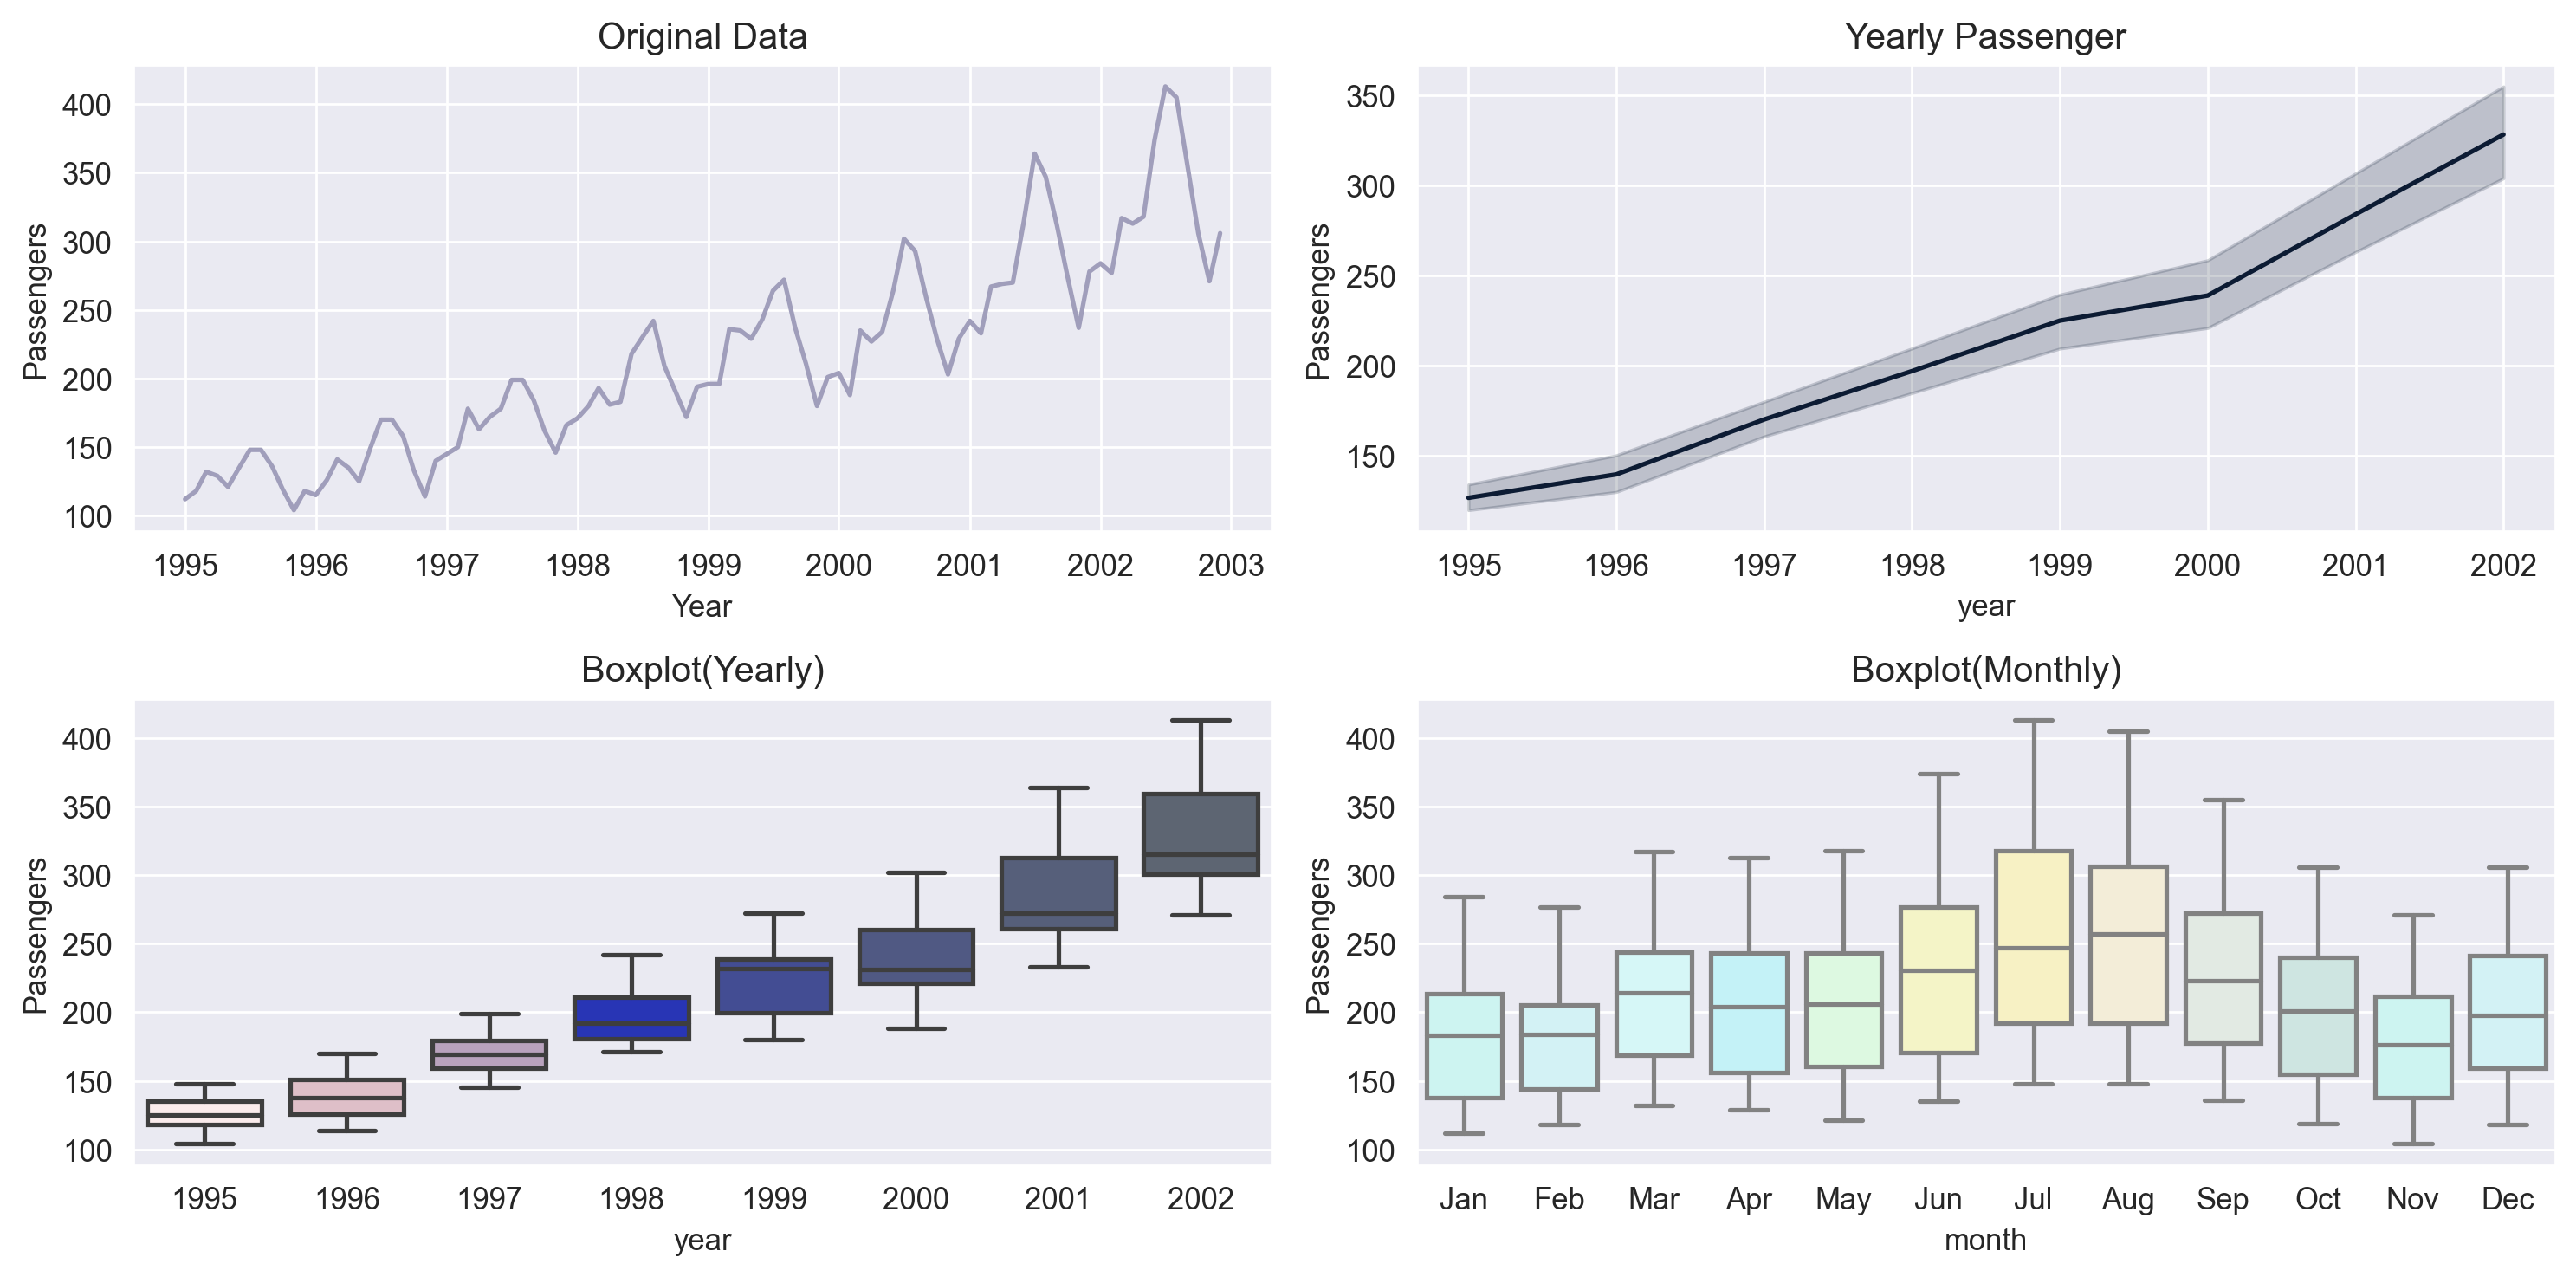

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

plt.setp(ax[0, 0], title = 'Original Data')
plt.setp(ax[0, 0], xlabel='Year')
sns.lineplot(x = al['Date'], y = al['Passengers'], ax = ax[0, 0], color = '#a09ebb')

plt.setp(ax[0, 1], title = 'Yearly Passenger')
sns.lineplot(x=al['year'],y=al['Passengers'], ax = ax[0, 1] , color = "#0c1b33")

ax[1, 0].title.set_text('Boxplot(Yearly)')
sns.boxplot(x = 'year', y = 'Passengers', data = al, ax = ax[1, 0], palette = ['#fde8e9', '#e3bac6', '#bc9ec1', '#1122cc', '#3543a1', '#47548b', '#505c80', '#596475'])

ax[1, 1].title.set_text('Boxplot(Monthly)')
sns.boxplot(x = 'month', y = 'Passengers', data = al, ax = ax[1, 1], palette = ['#c6fbf6', '#cdf7fb', '#d0fcfd', '#bbf9ff', '#d8fede', '#fbfcbf', '#fff8bc', '#f7efd4', '#e1ebe2', '#cae9e4'])

plt.tight_layout()

#### Using Subplots For Distplot And Heatmap

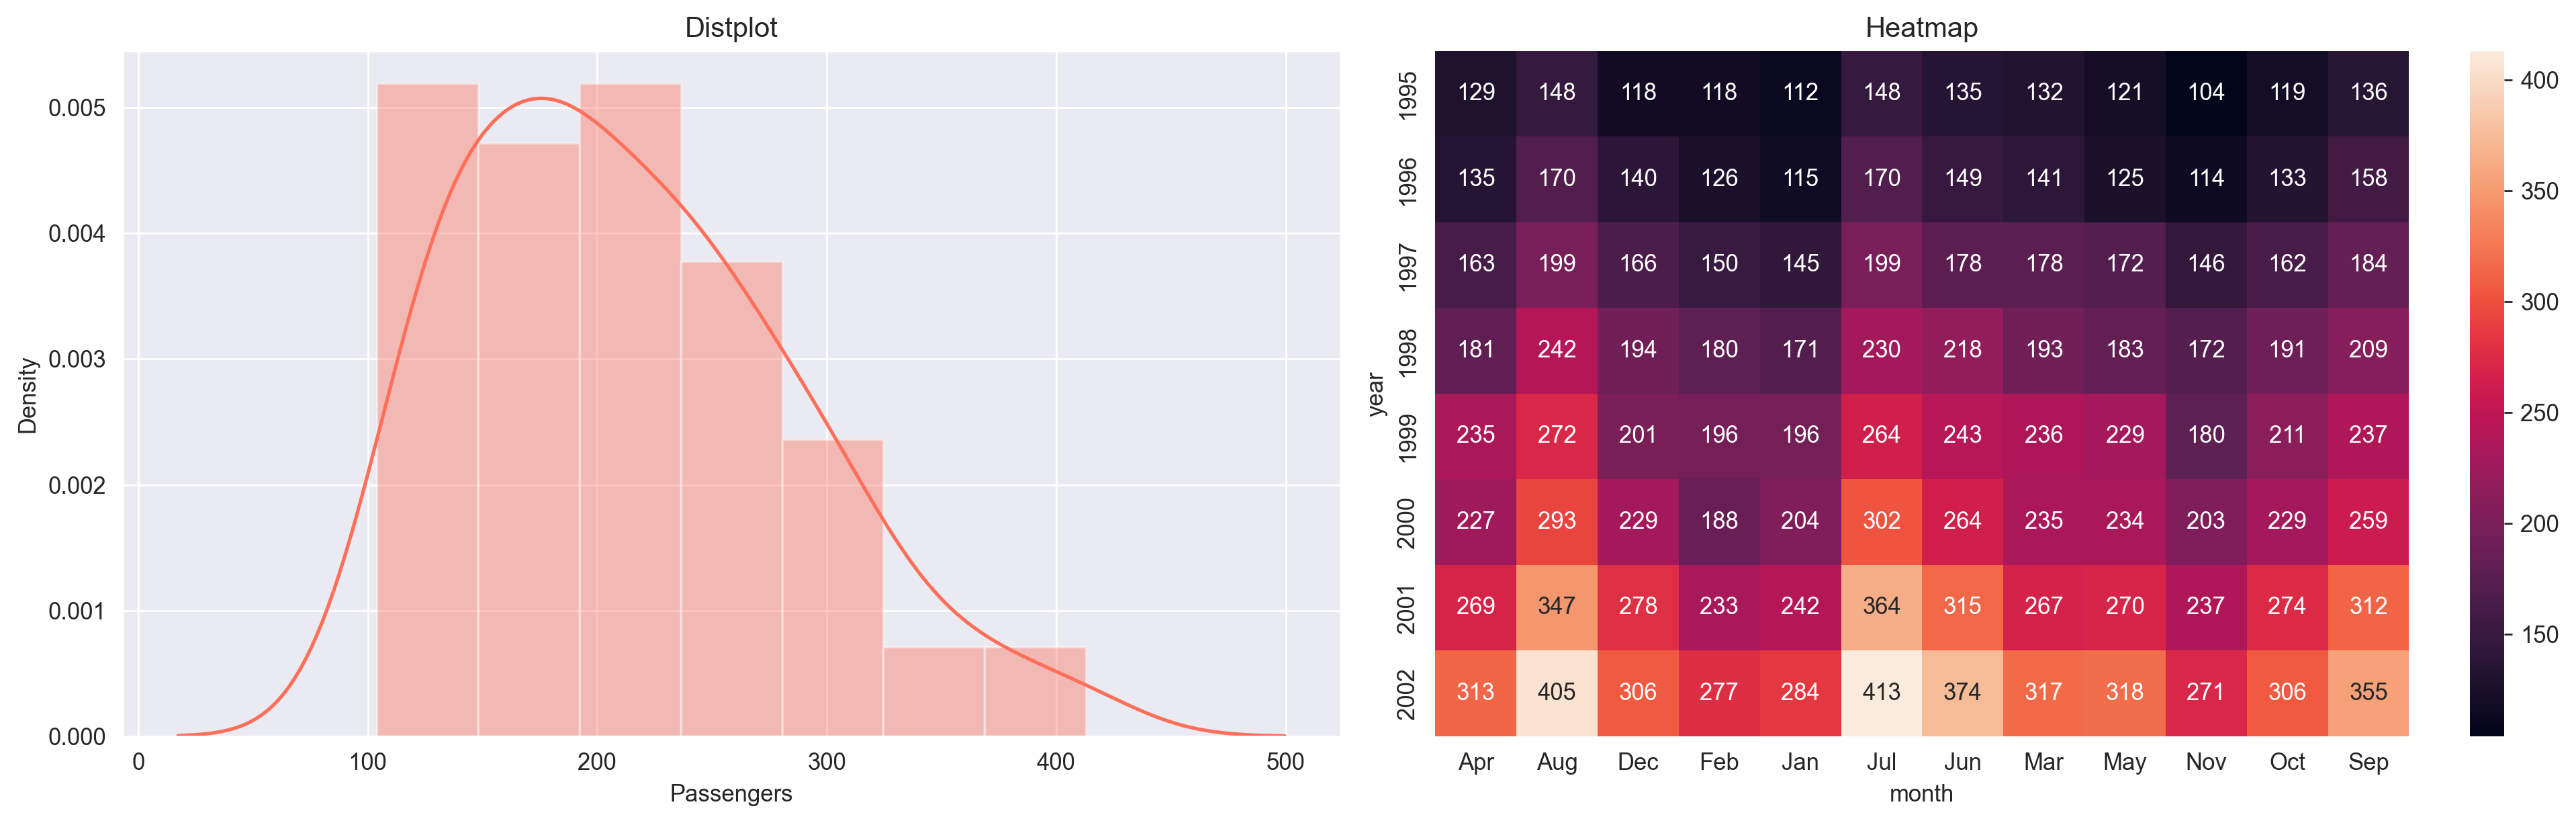

In [39]:
fig, ax = plt.subplots(ncols = 2, figsize=(16, 5))

ax[0].title.set_text('Distplot')
sns.distplot(al['Passengers'], color = '#ff6f59', ax=ax[0])

ax[1].title.set_text('Heatmap')
sns.heatmap(hm_y_m, annot = True, fmt="g", ax = ax[1])

plt.tight_layout()

## Performing Squared and Log Transformation

In [86]:
al['t'] = np.arange(1,97)
al['squared_t'] = al['t']*al['t']

al['log_Passengers'] = np.log(al['Passengers'])
al['sqrt_Passengers'] = np.sqrt(al['Passengers'])

al.head()

,Date,Passengers,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,squared_t,log_Passengers,sqrt_Passengers
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499,10.583005
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685,10.862780
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802,11.489125
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812,11.357817
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791,11.000000


### Comparing Original, Log And Sqrt Data With Line-Plot

<AxesSubplot:title={'center':'Sqrt Data'}, ylabel='sqrt_Passengers'>

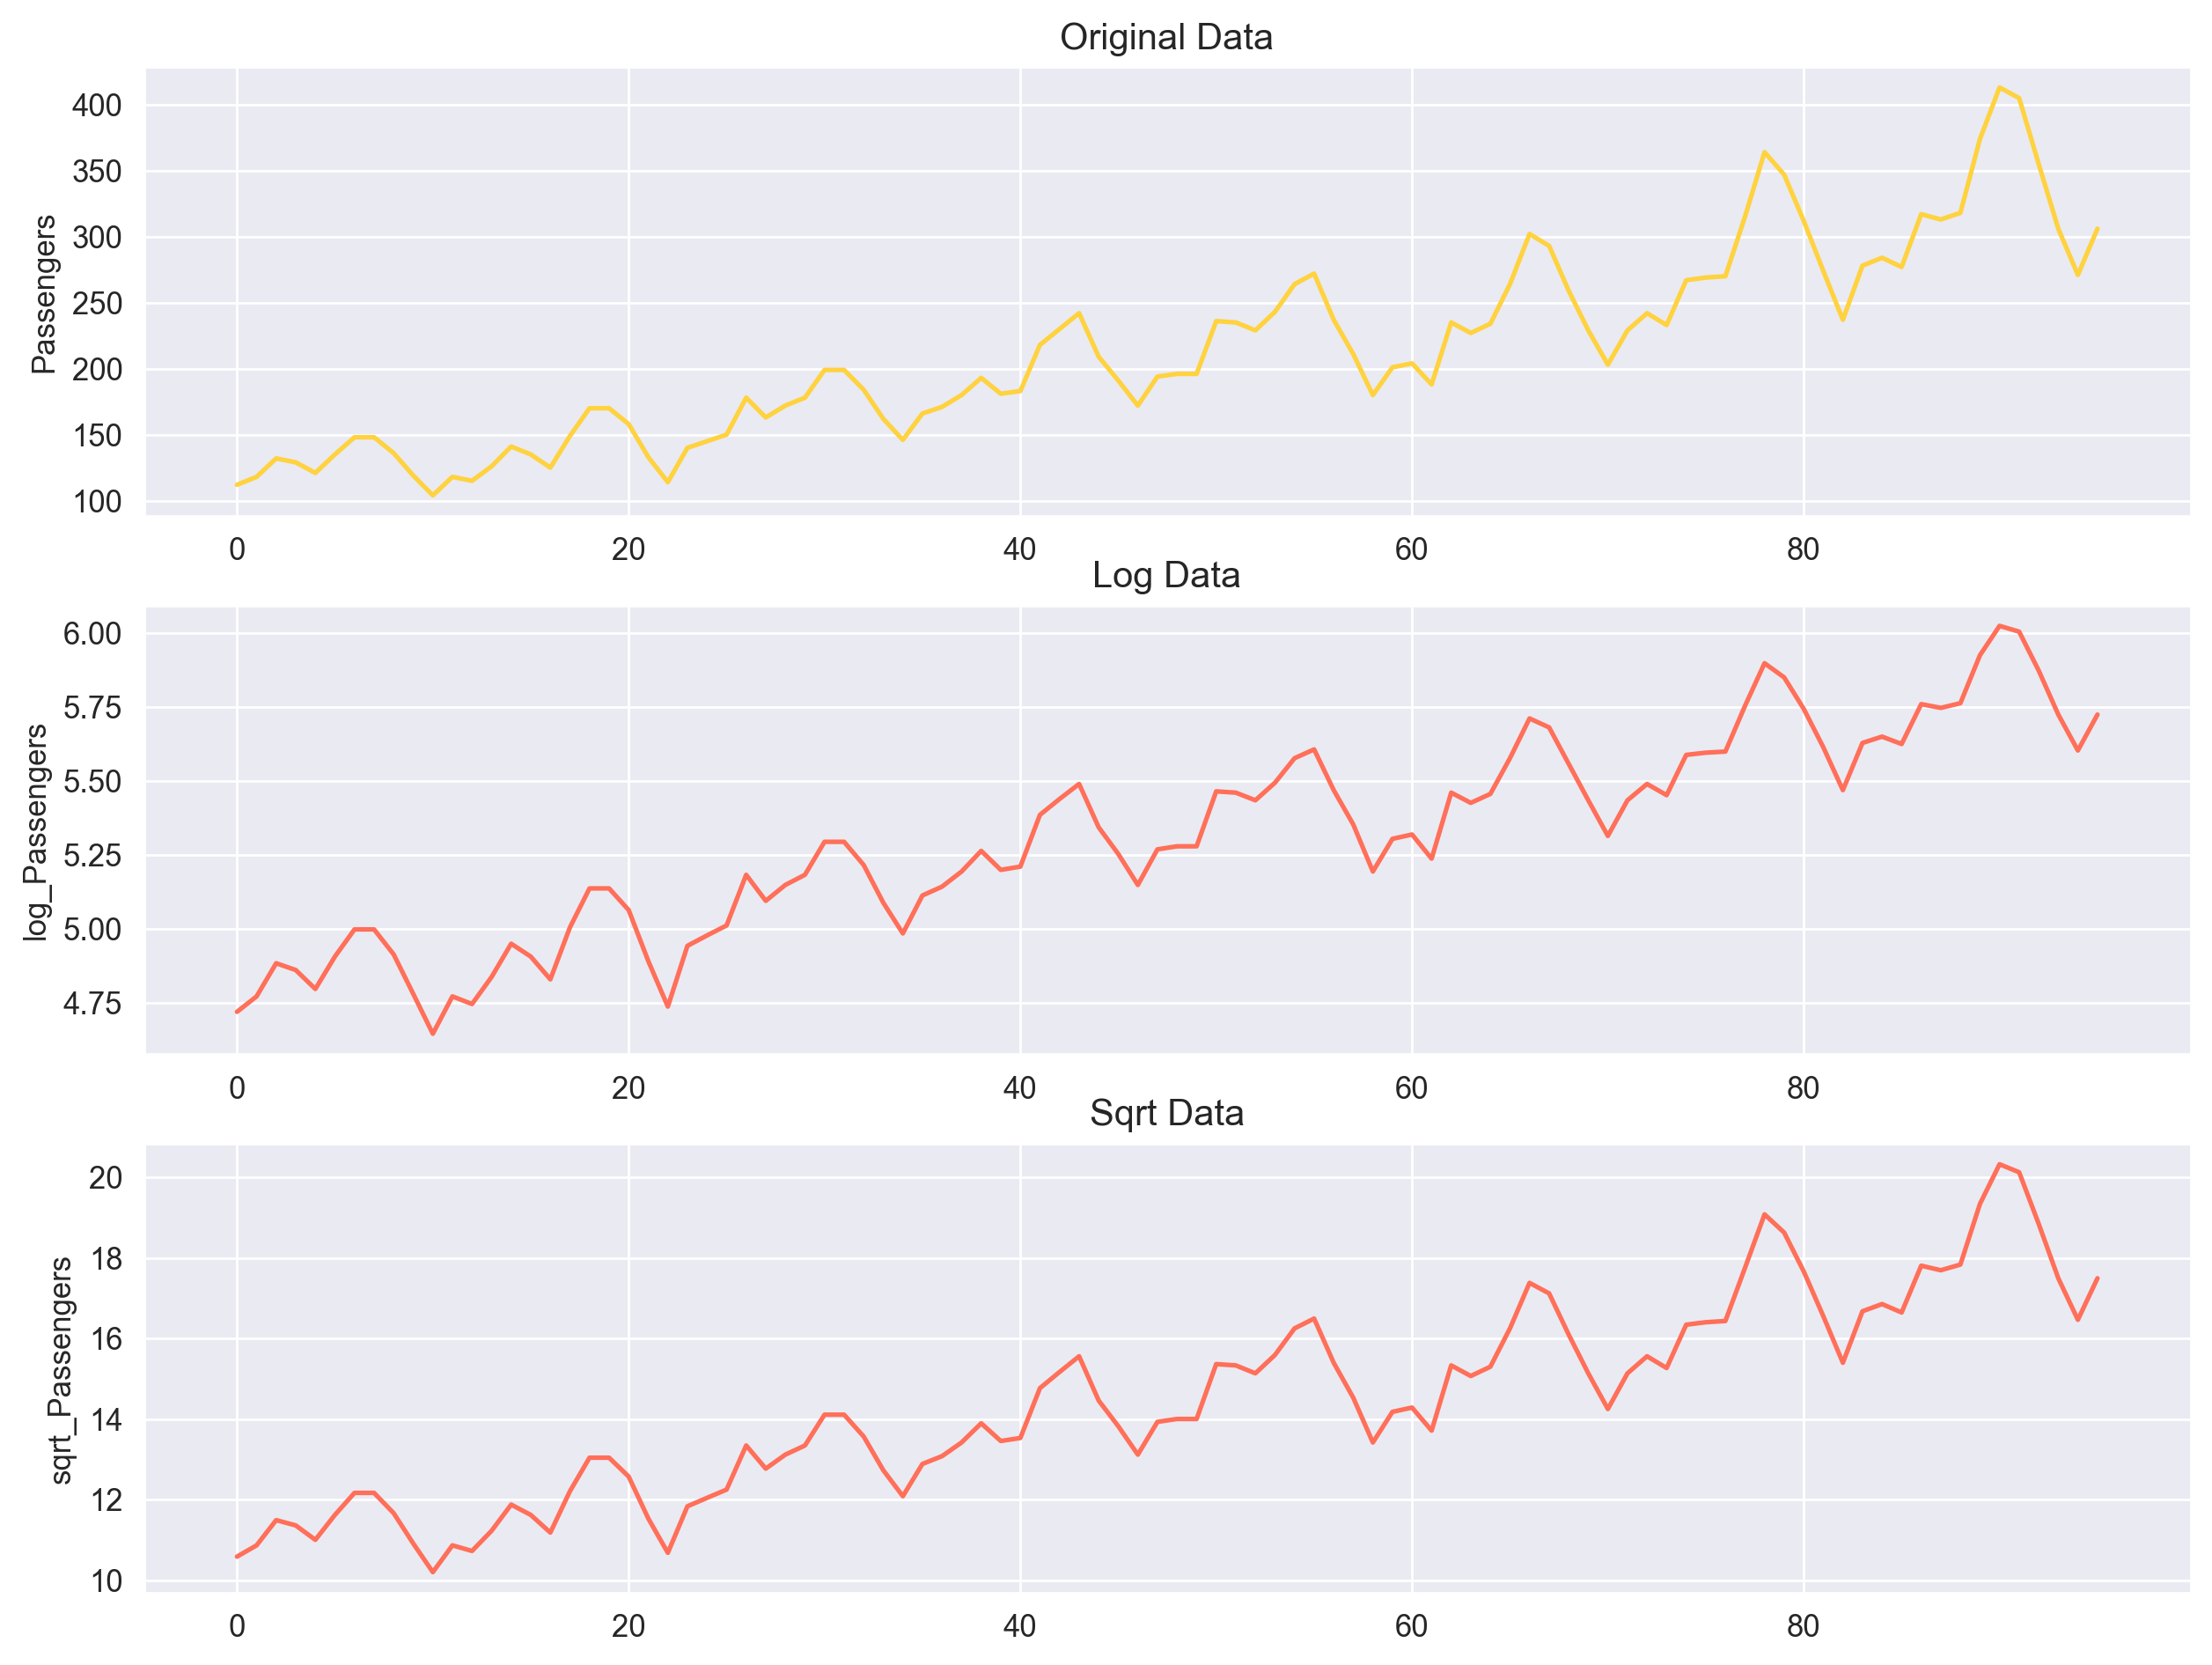

In [89]:
fig, ax = plt.subplots(nrows = 3, figsize=(12, 9))

plt.setp(ax[0], title = 'Original Data')
sns.lineplot(al['Passengers'], color = '#ffd23f', ax = ax[0])

plt.setp(ax[1], title = 'Log Data')
sns.lineplot(al['log_Passengers'], color = '#ff6f59', ax = ax[1])

plt.setp(ax[2], title = 'Sqrt Data')
sns.lineplot(al['sqrt_Passengers'], color = '#ff6f59', ax = ax[2])

### Comparing Original, Log And Sqrt Data With Dist-Plot

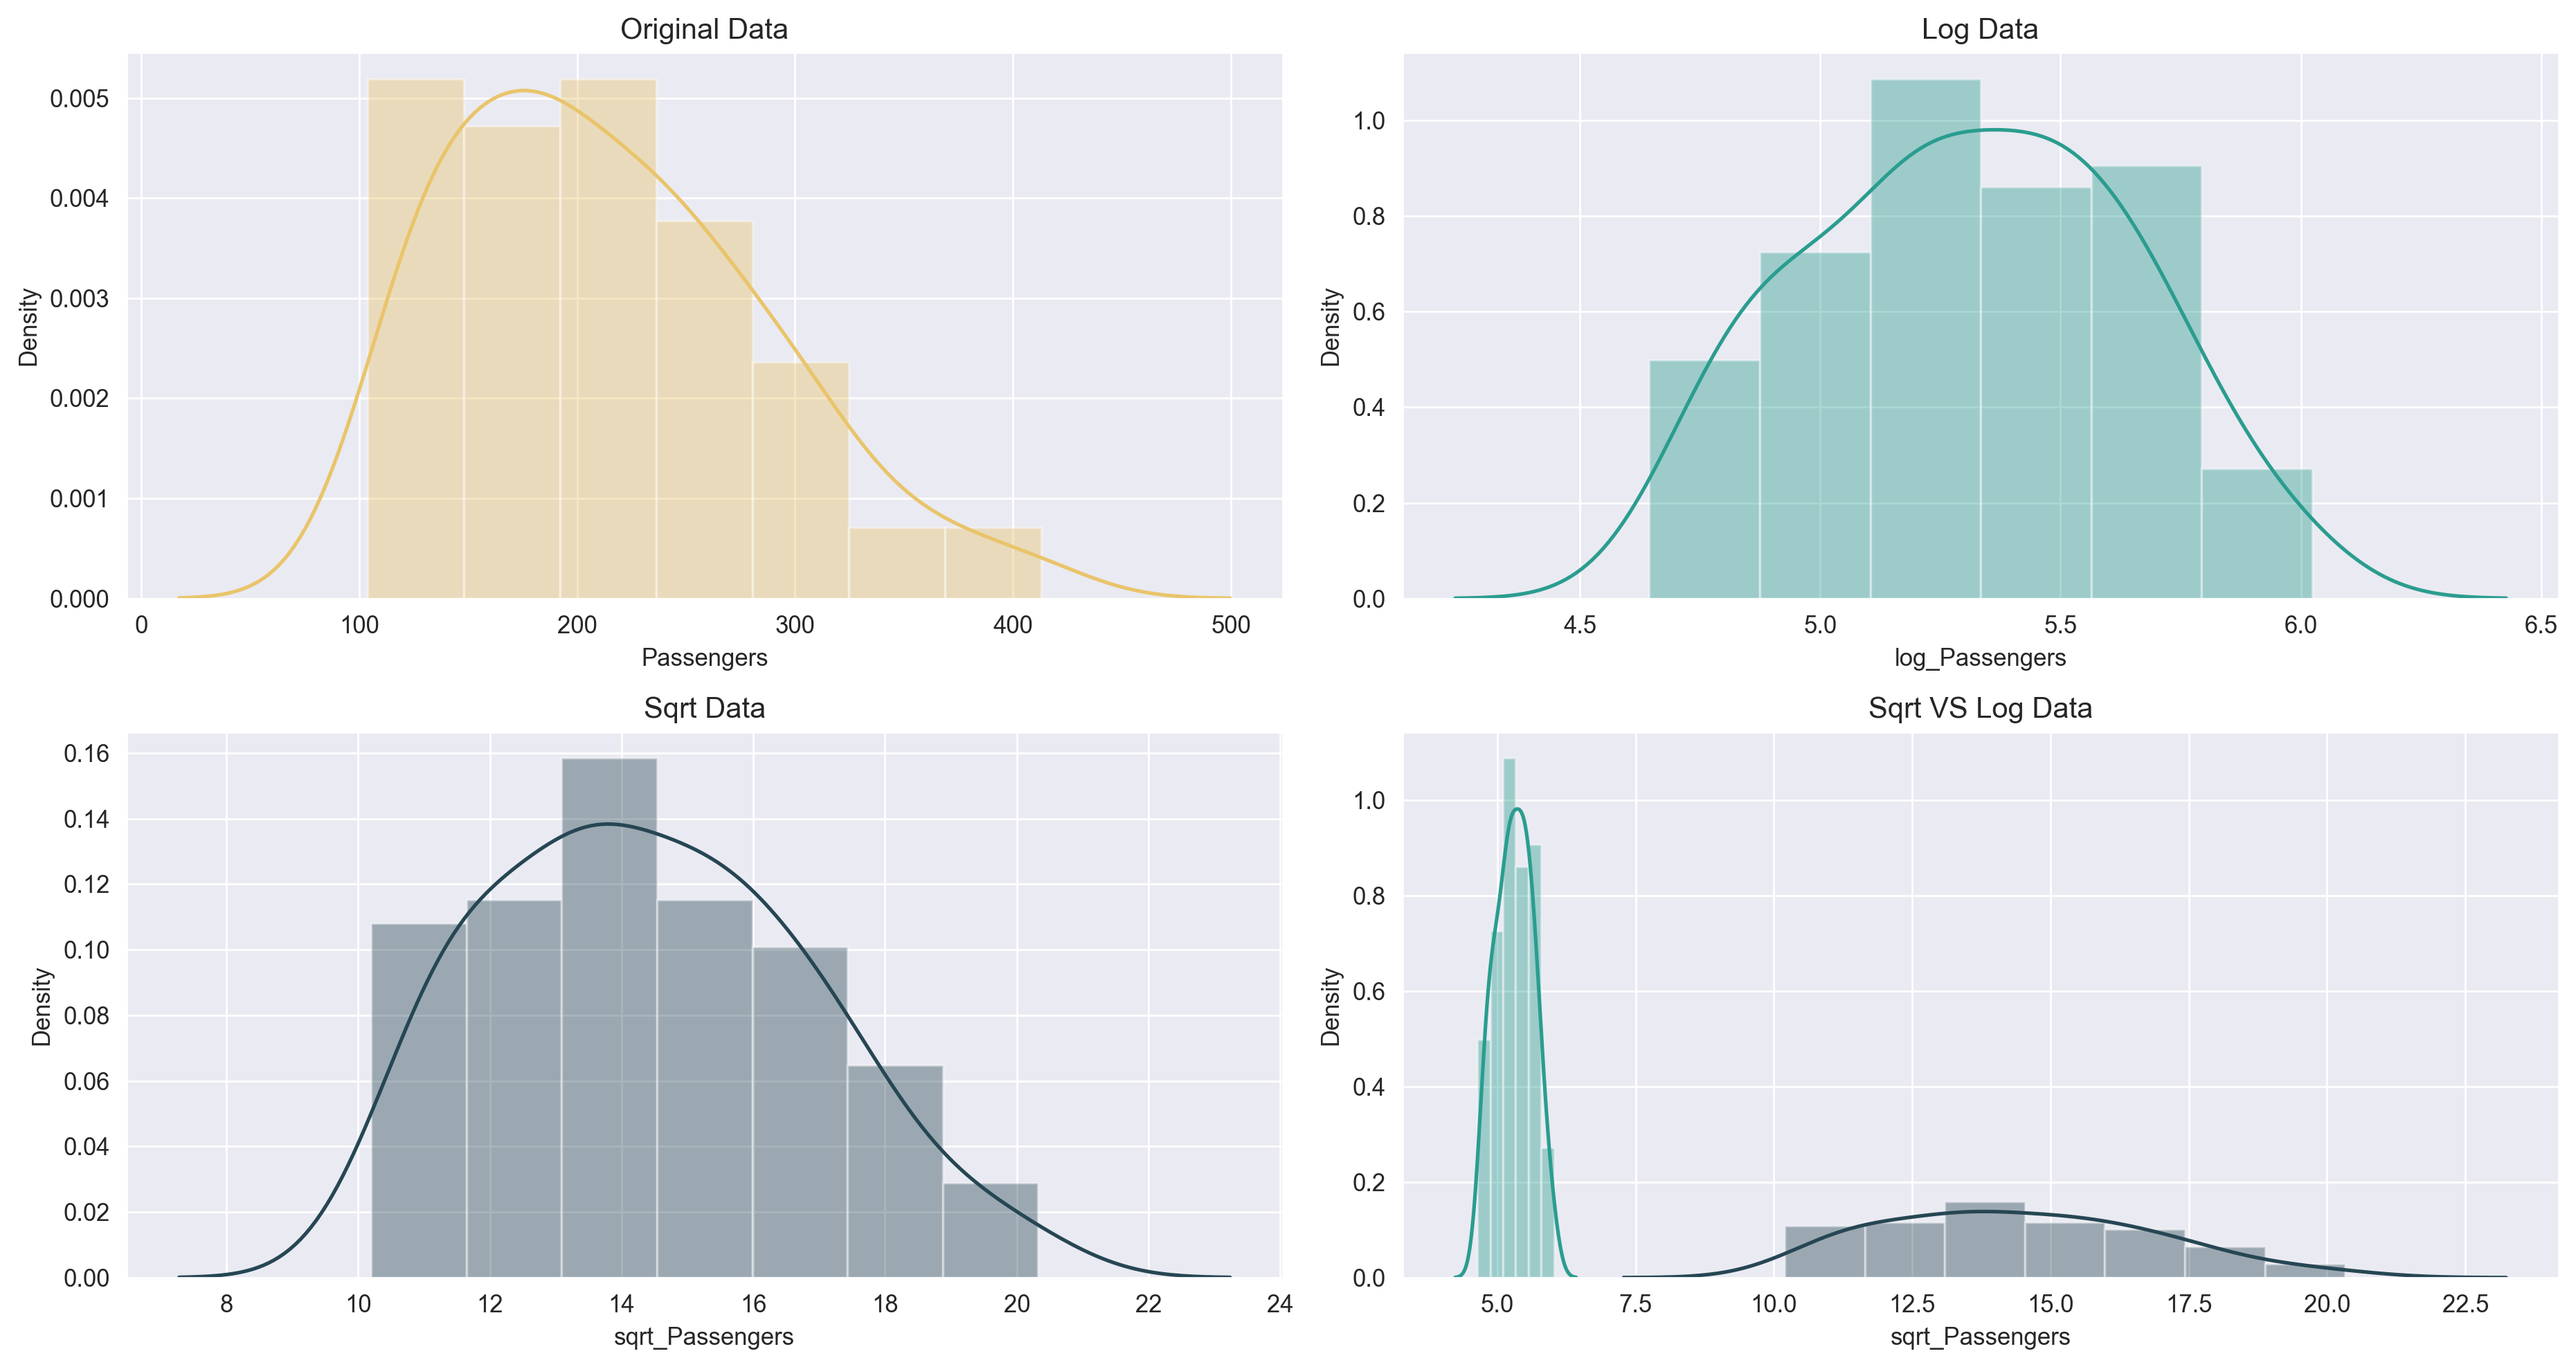

In [107]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

plt.setp(ax[0, 0], title = 'Original Data')
sns.distplot(al['Passengers'], color = '#e9c46a', ax = ax[0, 0])

plt.setp(ax[0, 1], title = 'Log Data')
sns.distplot(al['log_Passengers'], color = '#2a9d8f', ax = ax[0, 1])

plt.setp(ax[1, 0], title = 'Sqrt Data')
sns.distplot(al['sqrt_Passengers'], color = '#264653', ax = ax[1, 0])

plt.setp(ax[1, 1], title = 'Sqrt VS Log Data')
sns.distplot(al['log_Passengers'], color = '#2a9d8f', ax = ax[1, 1])
sns.distplot(al['sqrt_Passengers'], color = '#264653', ax = ax[1, 1])


plt.tight_layout()

## Performing First-Order Difference

In [120]:
fo = al.copy()
fo.set_index('Date', inplace = True)

fo['First-Order'] = fo['Passengers'].diff(periods = 1)

fo.drop(columns = ['month', 'year'], inplace = True)
fo.dropna(inplace=True)

fo.head()

,Passengers,First-Order
Date,,
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
1995-06-01,135,14.0


#### Ploting Original Data VS First Order Graph

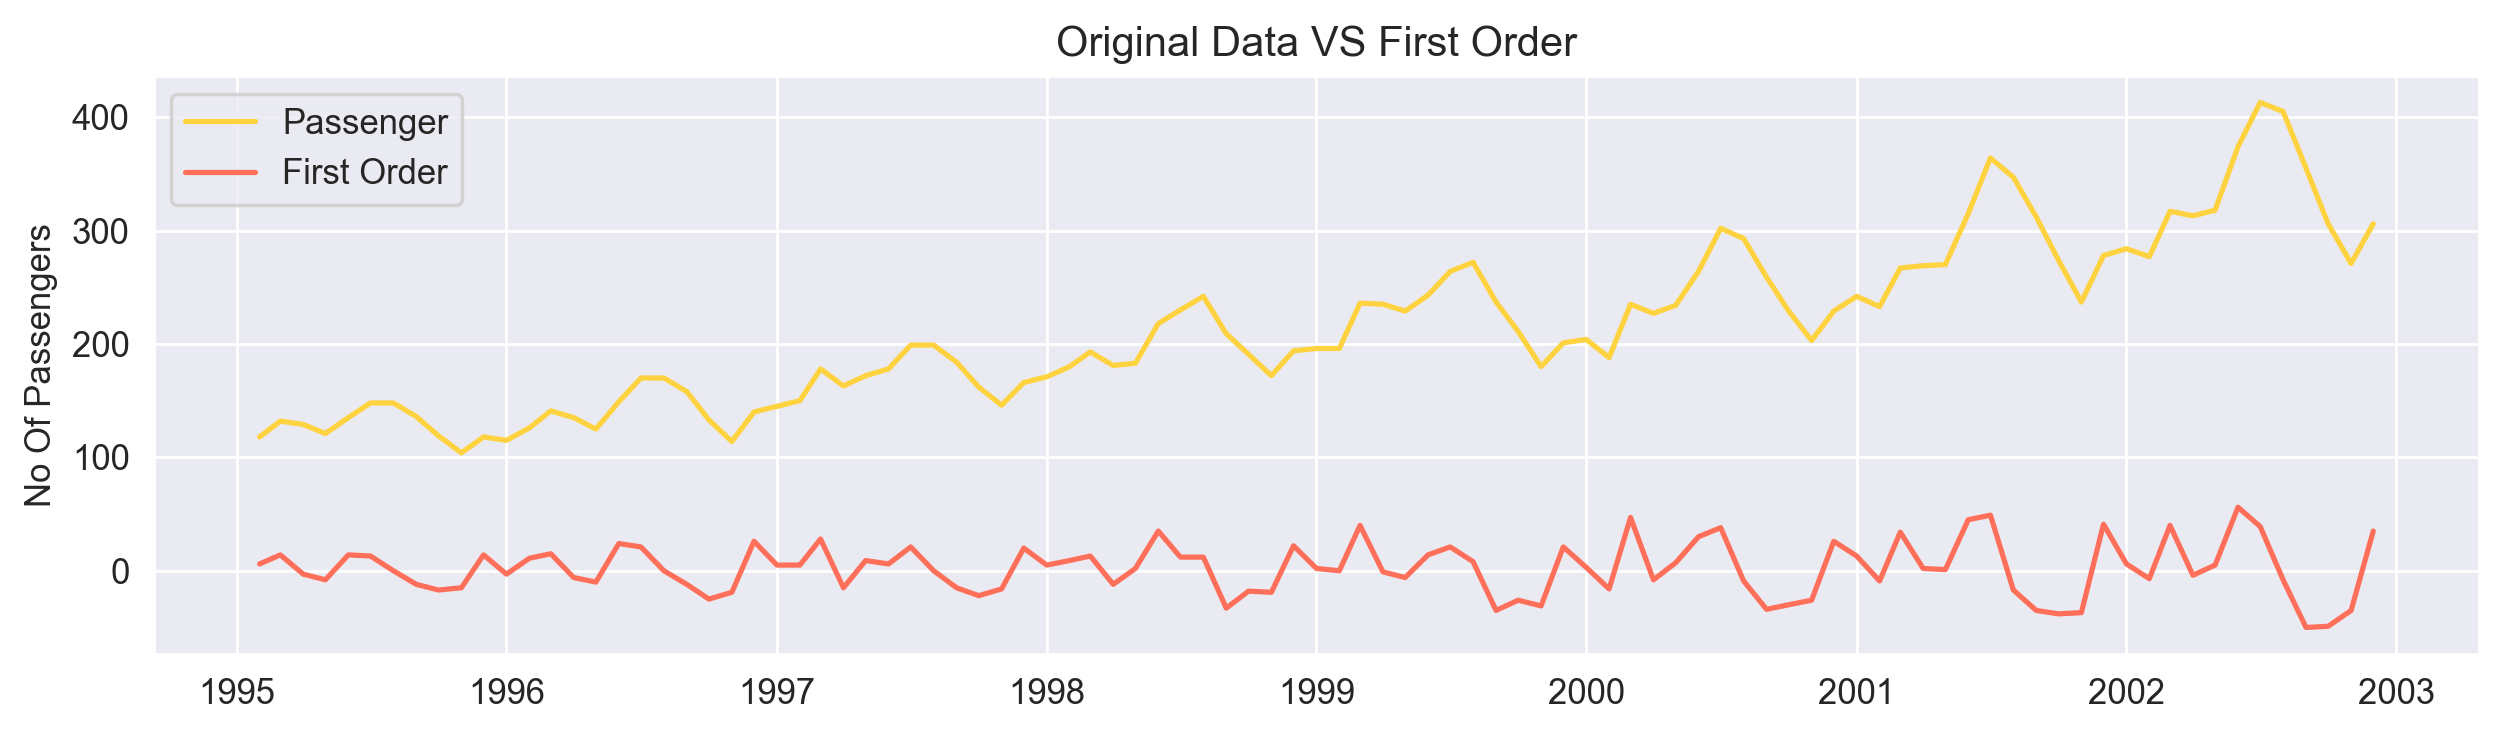

In [121]:
plt.title('Original Data VS First Order')
plt.ylabel('No Of Passengers')
plt.plot(fo['Passengers'], color = '#ffd23f', label = 'Passenger')
plt.plot(fo['First-Order'], color = '#ff6f59', label = 'First Order')
plt.legend()

#### Ploting Autocorrelation And Partial Autocorrelation Graph

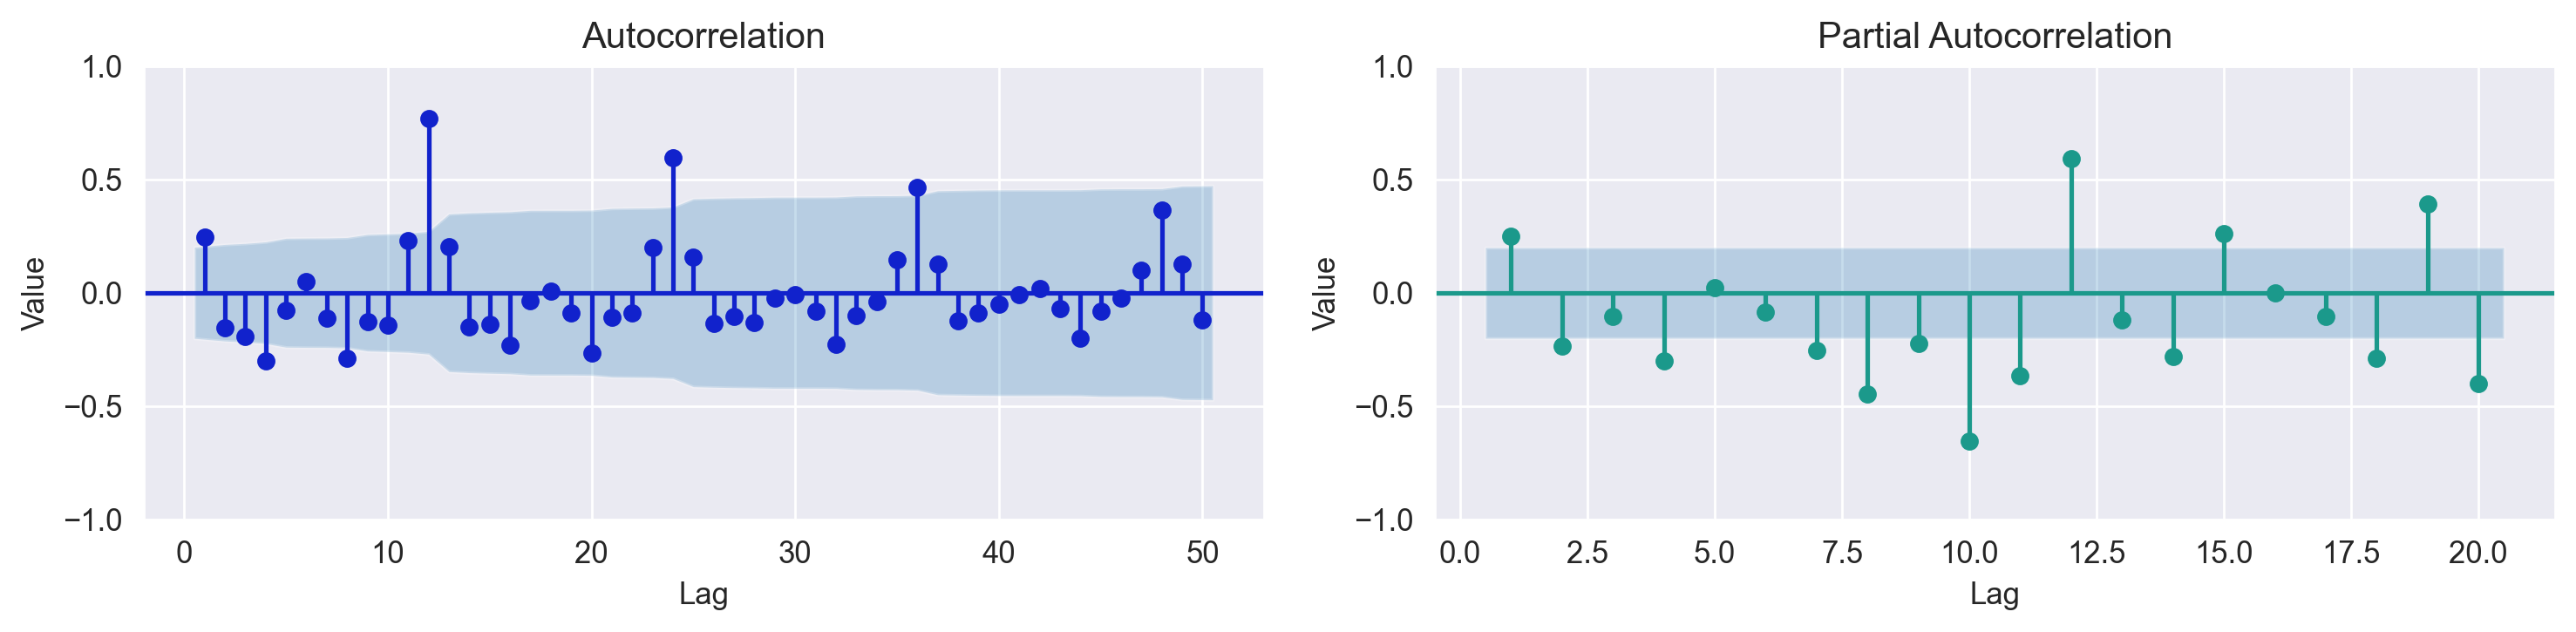

In [119]:
fig, ax = plt.subplots(ncols = 2)

plt.setp(ax[0], xlabel='Lag')
plt.setp(ax[0], ylabel='Value')
plot_acf(fo['First-Order'], lags=50, ax = ax[0], color='#1122cc', vlines_kwargs={"colors": '#1122cc'}, zero = False);

plt.setp(ax[1], xlabel='Lag')
plt.setp(ax[1], ylabel='Value')
plot_pacf(fo['First-Order'], ax = ax[1], color='#1b998b', vlines_kwargs={"colors": '#1b998b'}, zero = False);

plt.tight_layout()